In [2]:
import pandas as pd
import numpy as np
import operator
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import statsmodels.api as sm
#import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
#dataset containing sales transactions
ConsumerElectronics = pd.read_csv("./ConsumerElectronics.csv")

C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\4254553577.py:2: DtypeWarning: Columns (6,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  ConsumerElectronics = pd.read_csv("./ConsumerElectronics.csv")


In [5]:
ConsumerElectronics[1:5]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [6]:
#Set values into a normal format other than the shown Exponential form
pd.set_option('display.float_format', '{:0.2f}'.format)

In [7]:
ConsumerElectronics[1:5]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.00,1420830839915200.00,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.00,2421912925714800.00,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.00,4416592101738400.00,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.00,4419525153426400.00,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [8]:
ConsumerElectronics.describe()

,Year,Month,order_id,order_item_id,units,sla,product_mrp,product_procurement_sla
count,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00
mean,2015.52,6.59,2842444674146622.00,13756277530325592.00,1.02,5.69,4108.31,5.40
std,0.50,3.62,1269134332596903.50,55945981798628056.00,0.25,2.98,8510.92,53.47
min,2015.00,1.00,76331515.00,108016495.00,1.00,0.00,0.00,-1.00
25%,2015.00,3.00,1602588503969575.00,1606725138262300.00,1.00,4.00,799.00,1.00
50%,2016.00,6.00,2611824528743350.00,2619185472741150.00,1.00,6.00,1599.00,2.00
75%,2016.00,10.00,3610613539366250.00,4397705931628400.00,1.00,7.00,3499.00,3.00
max,2016.00,12.00,5395076790260600.00,300037347717704000.00,50.00,1006.00,299999.00,1000.00


In [9]:
# Renaming some of the columns 
ConsumerElectronics.rename(columns={"FSN_ID": "FSN_ID", "Order_date": "Order_date", "Order_id": "Order_id", "Order_item_id": "Order_item_id", "s1_fact.order_payment_type	": "payment_mode", "SLA" : "Procurement_SLA" })

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.00,3419300926147000.00,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.00,1420830839915200.00,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.00,2421912925714800.00,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.00,4416592101738400.00,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.00,4419525153426400.00,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648819,VPLEYAP3ZYYUVESU,2015-09-27 19:20:31,2015,9,4402170060025800.00,4402170060025800.00,2200,1,\N,\N,COD,7,-9.90634340213633E+017,7.89475898877674E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2
1648820,VPLEYAP3ZYYUVESU,2015-09-28 01:32:58,2015,9,1402393217090200.00,1402393217090200.00,2098,1,\N,\N,COD,10,3.04892345453077E+018,-1.45758574108572E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2
1648821,VPLEYAP3ZYYUVESU,2015-09-29 07:07:57,2015,9,4403459511294400.00,4403459511294400.00,2098,1,\N,\N,COD,5,-4.53140379455183E+018,5.74649014721365E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2
1648822,VPLEYAP3ZYYUVESU,2015-09-29 18:15:45,2015,9,4403860318235600.00,4403860318235600.00,2200,1,\N,\N,COD,3,-8.94046418180233E+018,2.57294814079718E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2


In [10]:
ConsumerElectronics.describe(include='all')

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
count,1648824,1648824,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00,1648824.00,1648824,1648824,1648824,1648824.00,1648824,1648824.00,1648824,1648824,1648824,1648824,1648824.00,1648824.00
unique,21219,1155192,NaN,NaN,NaN,NaN,18086.00,NaN,143,171,2,NaN,1253495,12973.00,1,5,14,74,NaN,NaN
top,ACCE6VGHYKYFX4WB,2016-04-27 00:19:27,NaN,NaN,NaN,NaN,999.00,NaN,\N,\N,COD,NaN,,-9031043207091489792.00,CE,EntertainmentSmall,Speaker,LaptopSpeaker,NaN,NaN
freq,37622,294,NaN,NaN,NaN,NaN,23738.00,NaN,1312972,1312971,1191443,NaN,4904,7743.00,1648824,944698,543928,287850,NaN,NaN
mean,NaN,NaN,2015.52,6.59,2842444674146622.00,13756277530325592.00,NaN,1.02,NaN,NaN,NaN,5.69,NaN,NaN,NaN,NaN,NaN,NaN,4108.31,5.40
std,NaN,NaN,0.50,3.62,1269134332596903.50,55945981798628056.00,NaN,0.25,NaN,NaN,NaN,2.98,NaN,NaN,NaN,NaN,NaN,NaN,8510.92,53.47
min,NaN,NaN,2015.00,1.00,76331515.00,108016495.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,-1.00
25%,NaN,NaN,2015.00,3.00,1602588503969575.00,1606725138262300.00,NaN,1.00,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN,NaN,799.00,1.00
50%,NaN,NaN,2016.00,6.00,2611824528743350.00,2619185472741150.00,NaN,1.00,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,NaN,1599.00,2.00
75%,NaN,NaN,2016.00,10.00,3610613539366250.00,4397705931628400.00,NaN,1.00,NaN,NaN,NaN,7.00,NaN,NaN,NaN,NaN,NaN,NaN,3499.00,3.00


In [11]:
pd.value_counts(ConsumerElectronics['gmv'].values, sort=False)

6400      18
6900      83
1990     418
1690     229
1618      10
        ... 
3857       2
3766       2
2686      26
12330      2
3225       2
Length: 18086, dtype: int64

In [12]:
#Convert date format
ConsumerElectronics['order_date_c']=pd.to_datetime(ConsumerElectronics['order_date'])

In [13]:
ConsumerElectronics['order_date'].head()

0    2015-10-17 15:11:54
1    2015-10-19 10:07:22
2    2015-10-20 15:45:56
3    2015-10-14 12:05:15
4    2015-10-17 21:25:03
Name: order_date, dtype: object

In [14]:
ConsumerElectronics['order_date_c'].head()

0   2015-10-17 15:11:54
1   2015-10-19 10:07:22
2   2015-10-20 15:45:56
3   2015-10-14 12:05:15
4   2015-10-17 21:25:03
Name: order_date_c, dtype: datetime64[ns]

In [15]:
#Extract the week number
ConsumerElectronics['week_year']=ConsumerElectronics['order_date_c'].dt.isocalendar().week

In [16]:
ConsumerElectronics['week_year'].head()


0    42
1    43
2    43
3    42
4    42
Name: week_year, dtype: UInt32

In [17]:
ConsumerElectronics['order_date_c'].head()

0   2015-10-17 15:11:54
1   2015-10-19 10:07:22
2   2015-10-20 15:45:56
3   2015-10-14 12:05:15
4   2015-10-17 21:25:03
Name: order_date_c, dtype: datetime64[ns]

In [18]:
#Select data only from week 28 2015 to week 26 2016
ConsumerElectronics = ConsumerElectronics[((ConsumerElectronics.Year ==2016) & (ConsumerElectronics.week_year <=26)) | ((ConsumerElectronics.Year ==2015) & (ConsumerElectronics.week_year >=28))]

In [19]:
#Adding 53 to the week nimber of 2016 so as to sort it easily
ConsumerElectronics['week_year']=np.where((operator.and_(ConsumerElectronics['week_year']<=26, ConsumerElectronics['Year']==2016)),ConsumerElectronics['week_year']+53,ConsumerElectronics['week_year'])

In [20]:
np.sort(ConsumerElectronics['week_year'].unique())

array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78,
       79], dtype=object)

In [21]:
#MRP

In [22]:
min(ConsumerElectronics['product_mrp'])

0

In [23]:
ConsumerElectronics=ConsumerElectronics[ConsumerElectronics['product_mrp']>0]

In [24]:
min(ConsumerElectronics['product_mrp'])

49

In [25]:
sum(ConsumerElectronics['product_mrp'].isna())

0

In [26]:
#GMV

In [27]:
#set al values of 0 in gmv to 1
ConsumerElectronics.gmv[ConsumerElectronics.gmv==0]=1
ConsumerElectronics.gmv[ConsumerElectronics.gmv==" "]=1

C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\466029716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ConsumerElectronics.gmv[ConsumerElectronics.gmv==" "]=1


In [28]:
ConsumerElectronics.gmv[ConsumerElectronics.gmv==0]

Series([], Name: gmv, dtype: object)

In [29]:
ConsumerElectronics.shape

(1629389, 22)

In [30]:
#Removing records where items are sold more than MRP - Ex: Bulk to individuals

In [31]:
ConsumerElectronics=ConsumerElectronics[pd.to_numeric(ConsumerElectronics.product_mrp*ConsumerElectronics.units)>=pd.to_numeric(ConsumerElectronics.gmv)]

In [32]:
ConsumerElectronics.shape

(1596124, 22)

In [33]:
ConsumerElectronics[1:5]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_c,week_year
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.00,1420830839915200.00,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 10:07:22,43
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.00,2421912925714800.00,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.00,4416592101738400.00,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.00,4419525153426400.00,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42


In [34]:
# subset data for one category - GamingAccessory

In [35]:
ConsumerElectronics.rename(columns={"s1_fact.order_payment_type": "payment_method"})

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,payment_method,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_c,week_year
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.00,3419300926147000.00,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,42
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.00,1420830839915200.00,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 10:07:22,43
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.00,2421912925714800.00,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.00,4416592101738400.00,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.00,4419525153426400.00,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648819,VPLEYAP3ZYYUVESU,2015-09-27 19:20:31,2015,9,4402170060025800.00,4402170060025800.00,2200,1,\N,\N,COD,7,-9.90634340213633E+017,7.89475898877674E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-27 19:20:31,39
1648820,VPLEYAP3ZYYUVESU,2015-09-28 01:32:58,2015,9,1402393217090200.00,1402393217090200.00,2098,1,\N,\N,COD,10,3.04892345453077E+018,-1.45758574108572E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-28 01:32:58,40
1648821,VPLEYAP3ZYYUVESU,2015-09-29 07:07:57,2015,9,4403459511294400.00,4403459511294400.00,2098,1,\N,\N,COD,5,-4.53140379455183E+018,5.74649014721365E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-29 07:07:57,40
1648822,VPLEYAP3ZYYUVESU,2015-09-29 18:15:45,2015,9,4403860318235600.00,4403860318235600.00,2200,1,\N,\N,COD,3,-8.94046418180233E+018,2.57294814079718E+018,CE,EntertainmentSmall,TVVideoSmall,VideoPlayer,2499,2,2015-09-29 18:15:45,40


In [36]:
ConsumerElectronics_home = ConsumerElectronics[ConsumerElectronics.product_analytic_sub_category == "HomeAudio"]

In [37]:
ConsumerElectronics_home.shape

(118323, 22)

In [38]:
pd.options.mode.chained_assignment = None  

In [39]:
#Forming new variables and formatting

In [40]:
ConsumerElectronics_home['gmv']=pd.to_numeric(ConsumerElectronics_home['gmv'])
ConsumerElectronics_home['list_price']=ConsumerElectronics_home['gmv']/ConsumerElectronics_home['units']
ConsumerElectronics_home['discount_offered']=(ConsumerElectronics_home['product_mrp']-ConsumerElectronics_home['list_price'])/ConsumerElectronics_home['product_mrp']

In [41]:
ConsumerElectronics_home [1:5]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_c,week_year,list_price,discount_offered
2841,ACCCZZC9XHZZ49FS,2015-10-16 09:03:09,2015,10,2418213882235600.00,2418213882235600.00,5489.00,1,\N,\N,Prepaid,2,-2.19573032414406E+018,5.51019732830323E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,2015-10-16 09:03:09,42,5489.00,0.27
2842,ACCCZZC9XHZZ49FS,2015-10-16 21:55:31,2015,10,2418675653264600.00,2418675653264600.00,6255.00,1,\N,\N,Prepaid,9,-8.69764155132085E+018,4.07895330887739E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,2015-10-16 21:55:31,42,6255.00,0.17
2843,ACCCZZC9XHZZ49FS,2015-10-16 23:25:07,2015,10,1418727172944200.00,1418727172944200.00,6099.00,1,\N,\N,Prepaid,3,-4.98961621154979E+018,9.06892083579869E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,2015-10-16 23:25:07,42,6099.00,0.19
2844,ACCCZZC9XHZZ49FS,2015-10-20 17:42:59,2015,10,2421983590777500.00,2421983590777500.00,6850.00,1,\N,\N,COD,9,6.04651405718702E+018,2.15973604441674E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,2015-10-20 17:42:59,43,6850.00,0.09


In [42]:
ConsumerElectronics_home['s1_fact.order_payment_type'].value_counts()

COD        89506
Prepaid    28817
Name: s1_fact.order_payment_type, dtype: int64

In [43]:
ConsumerElectronics_home['Prepaid_ind'] = np.where(ConsumerElectronics_home['s1_fact.order_payment_type']=='Prepaid', 1, 0)

In [44]:
ConsumerElectronics_home.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_date_c,week_year,list_price,discount_offered,Prepaid_ind
2840,ACCCZZC9XHZZ49FS,2015-10-03 20:35:30,2015,10,1407395732747800.00,1407395732747800.00,7049.00,1,\N,\N,Prepaid,5,-7.59891246232286E+018,-1.44900165321989E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,2015-10-03 20:35:30,40,7049.00,0.06,1
2841,ACCCZZC9XHZZ49FS,2015-10-16 09:03:09,2015,10,2418213882235600.00,2418213882235600.00,5489.00,1,\N,\N,Prepaid,2,-2.19573032414406E+018,5.51019732830323E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,2015-10-16 09:03:09,42,5489.00,0.27,1
2842,ACCCZZC9XHZZ49FS,2015-10-16 21:55:31,2015,10,2418675653264600.00,2418675653264600.00,6255.00,1,\N,\N,Prepaid,9,-8.69764155132085E+018,4.07895330887739E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,2015-10-16 21:55:31,42,6255.00,0.17,1
2843,ACCCZZC9XHZZ49FS,2015-10-16 23:25:07,2015,10,1418727172944200.00,1418727172944200.00,6099.00,1,\N,\N,Prepaid,3,-4.98961621154979E+018,9.06892083579869E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,2015-10-16 23:25:07,42,6099.00,0.19,1
2844,ACCCZZC9XHZZ49FS,2015-10-20 17:42:59,2015,10,2421983590777500.00,2421983590777500.00,6850.00,1,\N,\N,COD,9,6.04651405718702E+018,2.15973604441674E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,2015-10-20 17:42:59,43,6850.00,0.09,0


In [45]:
#Finding the percentage contribution of perpaid sales as total number of units sold

In [46]:
perc_cal=ConsumerElectronics_home.groupby(['week_year']).agg({'Prepaid_ind': ['sum','count']})
perc_cal.columns.values.tolist()

[('Prepaid_ind', 'sum'), ('Prepaid_ind', 'count')]

In [47]:
perc_cal.head()

Prepaid_ind      
                  sum count
week_year                  
28                525  2118
29                595  2483
30                490  2232
31                366  1579
32                  1     1

In [48]:
#Calculating the percentage. Aggregated at week_year level
prepaid_perc=perc_cal['Prepaid_ind','sum'].values/perc_cal['Prepaid_ind','count'].values

In [49]:
prepaid_perc=perc_cal['Prepaid_ind','sum'].values/perc_cal['Prepaid_ind','count'].values

In [50]:
ConsumerElectronics_home_agg=ConsumerElectronics_home.groupby(['week_year']).agg({'list_price': ['mean'],'gmv':['mean'], 'units':['mean'], 'sla': ['mean'], 'discount_offered': ['mean'], 'product_procurement_sla': ['mean'], 'Year': ['mean'], 'Month': ['mean'] })


In [51]:
ConsumerElectronics_home_agg.head()

,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month
,mean,mean,mean,mean,mean,mean,mean,mean
week_year,,,,,,,,
28,2200.19,2212.83,1.01,7.51,0.33,2.73,2015.00,7.00
29,2191.22,2204.34,1.01,7.11,0.35,2.65,2015.00,7.00
30,2105.87,2118.36,1.01,7.15,0.34,2.70,2015.00,7.00
31,2171.38,2181.93,1.01,7.30,0.34,2.66,2015.00,7.00
32,2599.00,2599.00,1.00,9.00,0.16,2.00,2015.00,8.00


In [52]:
#Creating the key variable 'week_year' for joining with other datasets
# Renaming the columns
ConsumerElectronics_home_agg.columns = ['list_price','gmv','units','sla','discount_offered','product_procurement_sla','Year','Month']
# Creating the key variable 'week_year' for joining with other datasets
ConsumerElectronics_home_agg['week_year']=ConsumerElectronics_home_agg.index
# Rounding off the month
ConsumerElectronics_home_agg['Month']=round(ConsumerElectronics_home_agg['Month'],0)

In [53]:
ConsumerElectronics_home_agg.head()

,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month,week_year
week_year,,,,,,,,,
28,2200.19,2212.83,1.01,7.51,0.33,2.73,2015.00,7.00,28
29,2191.22,2204.34,1.01,7.11,0.35,2.65,2015.00,7.00,29
30,2105.87,2118.36,1.01,7.15,0.34,2.70,2015.00,7.00,30
31,2171.38,2181.93,1.01,7.30,0.34,2.66,2015.00,7.00,31
32,2599.00,2599.00,1.00,9.00,0.16,2.00,2015.00,8.00,32


In [54]:
#Investment Dataset

In [55]:
investment = pd.read_csv('investments_data.csv')

In [56]:
investment.head()

,year,month,Total_investment,TV,Digital,Sponsorship,Content_marketing,Online_marketing,Affiliates,SEM,Radio,Other,nps,Stock_Index
0,2015,7,17.10,0.20,2.50,7.40,0.00,1.30,0.50,5.00,NaN,NaN,54.60,1177
1,2015,8,5.10,0.00,1.30,1.10,0.00,0.10,0.10,2.50,NaN,NaN,60.00,1206
2,2015,9,96.30,3.90,1.40,62.80,0.60,16.40,5.00,6.20,NaN,NaN,46.90,1101
3,2015,10,170.20,6.10,12.60,84.70,3.40,24.40,7.00,31.90,NaN,NaN,44.40,1210
4,2015,11,51.20,4.20,1.30,14.20,0.20,19.60,6.60,5.20,NaN,NaN,47.00,1233


In [57]:
columns = investment.columns

In [58]:
investment = investment.loc[:,['year','month','Total_investment', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'nps', 'Stock_Index']]

In [59]:
investment.head()

,year,month,Total_investment,TV,Digital,Sponsorship,Content_marketing,Online_marketing,Affiliates,SEM,nps,Stock_Index
0,2015,7,17.10,0.20,2.50,7.40,0.00,1.30,0.50,5.00,54.60,1177
1,2015,8,5.10,0.00,1.30,1.10,0.00,0.10,0.10,2.50,60.00,1206
2,2015,9,96.30,3.90,1.40,62.80,0.60,16.40,5.00,6.20,46.90,1101
3,2015,10,170.20,6.10,12.60,84.70,3.40,24.40,7.00,31.90,44.40,1210
4,2015,11,51.20,4.20,1.30,14.20,0.20,19.60,6.60,5.20,47.00,1233


In [60]:
corr = investment.corr()
corr.style.background_gradient(cmap='coolwarm')

,year,month,Total_investment,TV,Digital,Sponsorship,Content_marketing,Online_marketing,Affiliates,SEM,nps,Stock_Index
year,1.000000,-0.869048,-0.091077,0.155425,-0.388589,-0.293311,-0.239675,0.258331,0.319980,-0.360048,-0.054212,-0.012433
month,-0.869048,1.000000,0.234847,-0.043148,0.392445,0.473279,0.269707,-0.064250,-0.128192,0.419576,-0.170129,0.078332
Total_investment,-0.091077,0.234847,1.000000,0.710071,0.708917,0.899121,0.860018,0.753265,0.694639,0.811581,-0.818339,-0.337580
TV,0.155425,-0.043148,0.710071,1.000000,0.306223,0.549132,0.380395,0.625422,0.669278,0.350349,-0.591762,-0.543307
Digital,-0.388589,0.392445,0.708917,0.306223,1.000000,0.694983,0.899553,0.265926,0.188341,0.973189,-0.365392,0.101410
Sponsorship,-0.293311,0.473279,0.899121,0.549132,0.694983,1.000000,0.734325,0.495404,0.419455,0.771471,-0.657889,-0.242380
Content_marketing,-0.239675,0.269707,0.860018,0.380395,0.899553,0.734325,1.000000,0.582987,0.495040,0.957893,-0.612493,-0.054171
Online_marketing,0.258331,-0.064250,0.753265,0.625422,0.265926,0.495404,0.582987,1.000000,0.988907,0.435220,-0.886221,-0.214150
Affiliates,0.319980,-0.128192,0.694639,0.669278,0.188341,0.419455,0.495040,0.988907,1.000000,0.347755,-0.861605,-0.228392
SEM,-0.360048,0.419576,0.811581,0.350349,0.973189,0.771471,0.957893,0.435220,0.347755,1.000000,-0.520486,0.067102


In [61]:
# Affiliates is highly correlated with Online_marketing 
# SEM is highly correlated with Content_marketing (ρ = 0.95789) Rejected
# Removing variables based on dataset profiling multicollinearity output
investment_sht=investment.loc[:,['Content_marketing','Digital','month','nps','Sponsorship','Stock_Index','Total_investment','TV','year']]

In [62]:
# Renaming the datset for joining
investment_sht=investment_sht.rename(columns={"year": "Year","month":"Month"})

In [63]:
investment_sht.head()

,Content_marketing,Digital,Month,nps,Sponsorship,Stock_Index,Total_investment,TV,Year
0,0.00,2.50,7,54.60,7.40,1177,17.10,0.20,2015
1,0.00,1.30,8,60.00,1.10,1206,5.10,0.00,2015
2,0.60,1.40,9,46.90,62.80,1101,96.30,3.90,2015
3,3.40,12.60,10,44.40,84.70,1210,170.20,6.10,2015
4,0.20,1.30,11,47.00,14.20,1233,51.20,4.20,2015


In [64]:
#Joining investment with the aggregated sales data
ConsumerElectronics_home_full=pd.merge(ConsumerElectronics_home_agg,investment_sht,on=['Month','Year'])
ConsumerElectronics_home_full.head()

,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV
0,2200.19,2212.83,1.01,7.51,0.33,2.73,2015.00,7.00,28,0.00,2.50,54.60,7.40,1177,17.10,0.20
1,2191.22,2204.34,1.01,7.11,0.35,2.65,2015.00,7.00,29,0.00,2.50,54.60,7.40,1177,17.10,0.20
2,2105.87,2118.36,1.01,7.15,0.34,2.70,2015.00,7.00,30,0.00,2.50,54.60,7.40,1177,17.10,0.20
3,2171.38,2181.93,1.01,7.30,0.34,2.66,2015.00,7.00,31,0.00,2.50,54.60,7.40,1177,17.10,0.20
4,2599.00,2599.00,1.00,9.00,0.16,2.00,2015.00,8.00,32,0.00,1.30,60.00,1.10,1206,5.10,0.00


In [65]:
#Climate Data

In [66]:
climate=pd.read_csv("./Ecom_climate.csv")

In [67]:
climate.head()

,DateTime,Year,Month,Day,Max_Temp,Min_Temp,Mean_Temp,Heat_DegDays,Cool_DegDays,TotalRain,TotalSnow,TotalPrecip,SnowonGrnd
0,2015-01-01,2015,1,1,0.00,-8.50,-4.30,22.30,0.00,0.00,0.00,0.00,0.00
1,2015-01-02,2015,1,2,3.00,-3.00,0.00,18.00,0.00,0.00,0.00,0.00,0.00
2,2015-01-03,2015,1,3,2.50,-4.00,-0.80,18.80,0.00,24.00,0.00,24.00,0.00
3,2015-01-04,2015,1,4,2.50,0.00,1.30,16.70,0.00,0.00,1.00,1.00,0.00
4,2015-01-05,2015,1,5,-10.00,-13.50,-11.80,29.80,0.00,0.00,3.00,3.00,1.00


In [68]:
climate['DateTime']=pd.to_datetime(climate['DateTime'])
climate['week_year']=climate['DateTime'].dt.isocalendar().week

In [69]:
climate_bot=climate[operator.and_(climate['week_year']<=26, climate['Year']==2016)]
climate_bot['week_year']=climate_bot['week_year']+53
climate_top=climate[operator.and_(climate['week_year']>=28, climate['Year']==2015)]
climate_bot.head()

,DateTime,Year,Month,Day,Max_Temp,Min_Temp,Mean_Temp,Heat_DegDays,Cool_DegDays,TotalRain,TotalSnow,TotalPrecip,SnowonGrnd,week_year
368,2016-01-04,2016,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
369,2016-01-05,2016,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
370,2016-01-06,2016,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
371,2016-01-07,2016,1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
372,2016-01-08,2016,1,8,7.00,-14.00,-3.50,21.50,0.00,9.00,0.00,9.00,0.00,54


In [70]:
#Combining the relevant climatic data and validation
climate=climate_bot.append(climate_top)
climate['week_year'].unique()

C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\1074053485.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  climate=climate_bot.append(climate_top)


<IntegerArray>
[54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Length: 52, dtype: UInt32

In [71]:
# Dropping unnecessary variables
climate=climate.loc[:,['week_year','Cool_DegDays','Heat_DegDays','Max_Temp','SnowonGrnd','TotalPrecip','TotalSnow']]
climate_agg=climate.groupby(['week_year']).agg({'Cool_DegDays': ['mean'],'Heat_DegDays': ['mean'],'Max_Temp': ['mean'],'SnowonGrnd': ['mean'],'TotalPrecip': ['mean'],'TotalSnow': ['mean']})

In [72]:
climate_agg.head()

,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow
,mean,mean,mean,mean,mean,mean
week_year,,,,,,
28,2.38,0.28,24.83,0.00,4.42,0.00
29,5.18,0.00,28.75,0.00,1.40,0.00
30,5.06,0.00,29.75,0.00,0.90,0.00
31,6.57,0.00,31.58,0.00,4.63,0.00
32,3.65,0.00,27.20,0.00,0.28,0.00


In [73]:
#missing imputation for Cold
climate_agg['Cool_DegDays','mean'][climate_agg['Cool_DegDays','mean'].isna()]=0
#missing imputation for Heat
climate_agg['Heat_DegDays','mean'][climate_agg['Heat_DegDays','mean'].isna()]=21

In [74]:
prepaid_perc[:,]

array([0.24787535, 0.23962948, 0.21953405, 0.23179227, 1.        ,
       0.24300603, 0.21994135, 0.22459016, 0.22506165, 0.22760695,
       0.20906114, 0.25662396, 0.19277108, 0.18405546, 0.1804878 ,
       0.22323553, 0.18951393, 0.19161056, 0.19199619, 0.15709299,
       0.17830479, 0.22685301, 0.1827957 , 0.13535414, 0.18000885,
       0.21683849, 0.17811355, 0.15457898, 0.17415976, 0.19253137,
       0.17953902, 0.18920086, 0.2426633 , 0.19730337, 0.30152672,
       0.52086907, 0.95197044, 0.95354151, 0.93837535, 0.55817992,
       0.19810268, 0.18432077, 0.20066007, 0.22003474, 0.1942446 ,
       0.19458128, 0.22350674, 0.20258949, 0.17201166])

In [75]:
#Converting array to dataframe
prepaid_perc2 = pd.DataFrame({'prepaid_perc':prepaid_perc[:,]})
prepaid_perc2.head()

,prepaid_perc
0,0.25
1,0.24
2,0.22
3,0.23
4,1.00


In [76]:
climate_agg.index

Index([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], dtype='UInt32', name='week_year')

In [77]:
#Adding prepaid perc to the climatic information and creating week_year key for merging
climate_agg['week_year']=climate_agg.index
climate_agg.head()

,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,week_year
,mean,mean,mean,mean,mean,mean,
week_year,,,,,,,
28,2.38,0.28,24.83,0.00,4.42,0.00,28
29,5.18,0.00,28.75,0.00,1.40,0.00,29
30,5.06,0.00,29.75,0.00,0.90,0.00,30
31,6.57,0.00,31.58,0.00,4.63,0.00,31
32,3.65,0.00,27.20,0.00,0.28,0.00,32


In [78]:
climate_agg1 = pd.concat([climate_agg.reset_index(drop=True), prepaid_perc2], axis=1)
climate_agg1.head()

,"(Cool_DegDays, mean)","(Heat_DegDays, mean)","(Max_Temp, mean)","(SnowonGrnd, mean)","(TotalPrecip, mean)","(TotalSnow, mean)","(week_year, )",prepaid_perc
0,2.38,0.28,24.83,0.00,4.42,0.00,28,0.25
1,5.18,0.00,28.75,0.00,1.40,0.00,29,0.24
2,5.06,0.00,29.75,0.00,0.90,0.00,30,0.22
3,6.57,0.00,31.58,0.00,4.63,0.00,31,0.23
4,3.65,0.00,27.20,0.00,0.28,0.00,32,1.00


In [79]:
#Creating data frame with the list of holidays given
holiday_list=pd.DataFrame([["2015-07-18"],
                           ["2015-07-19"],
                           ["2015-08-15"],
                           ["2015-08-16"],
                           ["2015-08-17"],
                           ["2015-08-28"],
                           ["2015-08-29"],
                           ["2015-08-30"],
                           ["2015-10-15"],
                           ["2015-10-16"],
                           ["2015-10-17"],
                           ["2015-11-07"],
                           ["2015-11-08"],
                           ["2015-11-09"],
                           ["2015-11-10"],
                           ["2015-10-11"],
                           ["2015-10-12"],
                           ["2015-11-13"],
                           ["2015-11-14"],
                           ["2015-12-25"],
                           ["2015-12-26"],
                           ["2015-12-27"],
                           ["2015-12-28"],
                           ["2015-12-29"],
                           ["2015-12-30"],
                           ["2016-01-01"],
                           ["2016-01-02"],
                           ["2016-01-03"],
                           ["2016-01-20"],
                           ["2016-01-21"],
                           ["2016-01-22"],
                           ["2016-02-01"],
                           ["2016-02-02"],
                           ["2016-02-20"],
                           ["2016-02-21"],
                           ["2016-02-14"],
                           ["2016-02-15"],
                           ["2016-03-07"],
                           ["2016-03-08"],
                           ["2016-03-09"],
                           ["2016-05-25"],
                           ["2016-05-26"],
                           ["2016-05-27"]], columns=['holiday_day'])

In [80]:
#Creating the holiday flag
holiday_list['holiday_day']=pd.to_datetime(holiday_list['holiday_day'])
holiday_list['week_year']=holiday_list['holiday_day'].dt.isocalendar().week
holiday_list

,holiday_day,week_year
0,2015-07-18,29
1,2015-07-19,29
2,2015-08-15,33
3,2015-08-16,33
4,2015-08-17,34
5,2015-08-28,35
6,2015-08-29,35
7,2015-08-30,35
8,2015-10-15,42
9,2015-10-16,42


In [81]:
holiday_list['week_year']=np.where(holiday_list['week_year']<=26,holiday_list['week_year']+53,holiday_list['week_year'])
holiday_list

,holiday_day,week_year
0,2015-07-18,29
1,2015-07-19,29
2,2015-08-15,33
3,2015-08-16,33
4,2015-08-17,34
5,2015-08-28,35
6,2015-08-29,35
7,2015-08-30,35
8,2015-10-15,42
9,2015-10-16,42


In [82]:
holiday_df=pd.DataFrame(holiday_list['week_year'].unique(),columns=['week_year'])
holiday_df['holiday_flag']=1
holiday_df.head()

,week_year,holiday_flag
0,29,1
1,33,1
2,34,1
3,35,1
4,42,1


In [83]:
#Creating the pay day flag
pay_list=pd.date_range('2015-07-01','2016-06-30', freq='SMS').strftime("%Y-%m-%d").tolist()
pay_list

['2015-07-01',
 '2015-07-15',
 '2015-08-01',
 '2015-08-15',
 '2015-09-01',
 '2015-09-15',
 '2015-10-01',
 '2015-10-15',
 '2015-11-01',
 '2015-11-15',
 '2015-12-01',
 '2015-12-15',
 '2016-01-01',
 '2016-01-15',
 '2016-02-01',
 '2016-02-15',
 '2016-03-01',
 '2016-03-15',
 '2016-04-01',
 '2016-04-15',
 '2016-05-01',
 '2016-05-15',
 '2016-06-01',
 '2016-06-15']

In [84]:
pay_list=pd.DataFrame(pay_list,columns=['pay_list'])
pay_list['pay_list']=pd.to_datetime(pay_list['pay_list'])
pay_list['week_year']=pay_list['pay_list'].dt.isocalendar().week
pay_list

,pay_list,week_year
0,2015-07-01,27
1,2015-07-15,29
2,2015-08-01,31
3,2015-08-15,33
4,2015-09-01,36
5,2015-09-15,38
6,2015-10-01,40
7,2015-10-15,42
8,2015-11-01,44
9,2015-11-15,46


In [85]:
pay_list['week_year']=np.where(pay_list['week_year']<=26,pay_list['week_year']+53,pay_list['week_year'])
pay_df=pd.DataFrame(pay_list['week_year'].unique(),columns=['week_year'])
pay_df['pay_flag']=1
pay_df

,week_year,pay_flag
0,27,1
1,29,1
2,31,1
3,33,1
4,36,1
5,38,1
6,40,1
7,42,1
8,44,1
9,46,1


In [86]:
climate_agg1.columns.values

array([('Cool_DegDays', 'mean'), ('Heat_DegDays', 'mean'),
       ('Max_Temp', 'mean'), ('SnowonGrnd', 'mean'),
       ('TotalPrecip', 'mean'), ('TotalSnow', 'mean'), ('week_year', ''),
       'prepaid_perc'], dtype=object)

In [87]:
#Renaming the agg climatic data columns
climate_agg1.columns = ['Cool_DegDays', 'Heat_DegDays', 'Max_Temp','SnowonGrnd','TotalPrecip','TotalSnow','week_year','prepaid_perc'] 

In [88]:
#holiday_df,pay_df,climate_agg1,ConsumerElectronics_gaming_full - datasets merge
ConsumerElectronics_home_full=pd.merge(ConsumerElectronics_home_full,climate_agg1,on=['week_year'],how='left')
ConsumerElectronics_home_full=pd.merge(ConsumerElectronics_home_full,pay_df,on=['week_year'],how='left')
ConsumerElectronics_home_full=pd.merge(ConsumerElectronics_home_full,holiday_df,on=['week_year'],how='left')
ConsumerElectronics_home_full.shape

(49, 25)

In [89]:
ConsumerElectronics_home_full

,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,prepaid_perc,pay_flag,holiday_flag
0,2200.19,2212.83,1.01,7.51,0.33,2.73,2015.00,7.00,28,0.00,2.50,54.60,7.40,1177,17.10,0.20,2.38,0.28,24.83,0.00,4.42,0.00,0.25,NaN,NaN
1,2191.22,2204.34,1.01,7.11,0.35,2.65,2015.00,7.00,29,0.00,2.50,54.60,7.40,1177,17.10,0.20,5.18,0.00,28.75,0.00,1.40,0.00,0.24,1.00,1.00
2,2105.87,2118.36,1.01,7.15,0.34,2.70,2015.00,7.00,30,0.00,2.50,54.60,7.40,1177,17.10,0.20,5.06,0.00,29.75,0.00,0.90,0.00,0.22,NaN,NaN
3,2171.38,2181.93,1.01,7.30,0.34,2.66,2015.00,7.00,31,0.00,2.50,54.60,7.40,1177,17.10,0.20,6.57,0.00,31.58,0.00,4.63,0.00,0.23,1.00,NaN
4,2599.00,2599.00,1.00,9.00,0.16,2.00,2015.00,8.00,32,0.00,1.30,60.00,1.10,1206,5.10,0.00,3.65,0.00,27.20,0.00,0.28,0.00,1.00,NaN,NaN
5,2076.28,2088.59,1.01,5.58,0.38,2.73,2015.00,9.00,36,0.60,1.40,46.90,62.80,1101,96.30,3.90,6.46,0.00,30.42,0.00,10.10,0.00,0.23,1.00,NaN
6,2020.42,2030.58,1.01,5.51,0.38,2.79,2015.00,9.00,37,0.60,1.40,46.90,62.80,1101,96.30,3.90,2.52,1.28,23.50,0.00,0.96,0.00,0.23,NaN,NaN
7,1998.13,2019.63,1.01,6.22,0.37,2.62,2015.00,9.00,38,0.60,1.40,46.90,62.80,1101,96.30,3.90,2.55,0.00,24.75,0.00,0.55,0.00,0.21,1.00,NaN
8,1858.93,1864.81,1.01,6.33,0.35,2.63,2015.00,9.00,39,0.60,1.40,46.90,62.80,1101,96.30,3.90,2.00,0.00,26.00,0.00,0.00,0.00,0.26,NaN,NaN
9,1928.85,1942.91,1.01,6.21,0.36,2.49,2015.00,9.00,40,0.60,1.40,46.90,62.80,1101,96.30,3.90,1.65,1.93,19.70,0.00,3.72,0.00,0.19,1.00,NaN


In [90]:
#VALIDATING

In [91]:
len(ConsumerElectronics_home_full)

49

In [92]:
Total_week = 79-28+1
Total_week

52

In [93]:
ConsumerElectronics_home_full.describe()


,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,prepaid_perc,pay_flag,holiday_flag
count,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,46.00,22.00,13.00
mean,2168.86,2183.68,1.01,5.67,0.38,2.54,2015.53,6.49,0.70,2.52,48.80,33.56,1151.06,75.86,4.04,1.31,7.90,16.63,0.42,2.91,0.27,0.28,1.00,1.00
std,138.58,139.72,0.01,0.92,0.05,0.22,0.50,3.58,0.90,3.13,3.21,24.63,84.26,39.96,2.54,2.08,7.34,9.54,1.58,3.59,0.76,0.22,0.00,0.00
min,1858.93,1864.81,1.00,3.94,0.16,1.50,2015.00,1.00,0.00,0.50,44.40,1.10,1015.00,5.10,0.00,0.00,0.00,-2.83,0.00,0.00,0.00,0.14,1.00,1.00
25%,2091.51,2100.58,1.01,5.00,0.36,2.49,2015.00,3.00,0.00,1.30,46.90,11.70,1052.00,48.10,1.70,0.00,0.42,8.25,0.00,0.30,0.00,0.18,1.00,1.00
50%,2164.09,2181.88,1.01,5.58,0.38,2.57,2016.00,6.00,0.60,1.40,47.30,25.00,1194.00,74.20,4.20,0.00,7.10,17.00,0.00,1.72,0.00,0.20,1.00,1.00
75%,2206.93,2224.05,1.01,5.95,0.40,2.66,2016.00,10.00,0.90,2.50,50.50,56.70,1222.00,100.00,5.40,2.52,12.83,24.83,0.00,4.25,0.00,0.23,1.00,1.00
max,2599.00,2599.00,1.06,9.00,0.47,2.85,2016.00,12.00,3.40,12.60,60.00,84.70,1242.00,170.20,9.30,6.57,25.27,31.70,10.33,15.70,3.00,1.00,1.00,1.00


In [94]:
#Missing replacement
ConsumerElectronics_home_full=ConsumerElectronics_home_full.fillna(0)
ConsumerElectronics_home_full.head()

,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,prepaid_perc,pay_flag,holiday_flag
0,2200.19,2212.83,1.01,7.51,0.33,2.73,2015.00,7.00,28,0.00,2.50,54.60,7.40,1177,17.10,0.20,2.38,0.28,24.83,0.00,4.42,0.00,0.25,0.00,0.00
1,2191.22,2204.34,1.01,7.11,0.35,2.65,2015.00,7.00,29,0.00,2.50,54.60,7.40,1177,17.10,0.20,5.18,0.00,28.75,0.00,1.40,0.00,0.24,1.00,1.00
2,2105.87,2118.36,1.01,7.15,0.34,2.70,2015.00,7.00,30,0.00,2.50,54.60,7.40,1177,17.10,0.20,5.06,0.00,29.75,0.00,0.90,0.00,0.22,0.00,0.00
3,2171.38,2181.93,1.01,7.30,0.34,2.66,2015.00,7.00,31,0.00,2.50,54.60,7.40,1177,17.10,0.20,6.57,0.00,31.58,0.00,4.63,0.00,0.23,1.00,0.00
4,2599.00,2599.00,1.00,9.00,0.16,2.00,2015.00,8.00,32,0.00,1.30,60.00,1.10,1206,5.10,0.00,3.65,0.00,27.20,0.00,0.28,0.00,1.00,0.00,0.00


In [95]:
# Define Adstock Rate by creating a function
adstock_rate = 0.50

def adstocked_advertising(adstock_rate, advertising):
    
    adstocked_advertising = []
    for i in range(len(advertising)):
        if i == 0: 
            adstocked_advertising.append(advertising[i])
        else:
            adstocked_advertising.append(advertising[i] + adstock_rate * adstocked_advertising[i-1])            
    return adstocked_advertising

In [96]:
#Creating adstock to the media variables as they would carry the adstock effect
ConsumerElectronics_home_full['Adstock_Content_marketing'] = adstocked_advertising(adstock_rate=0.5, advertising=ConsumerElectronics_home_full['Content_marketing'])
ConsumerElectronics_home_full['Adstock_Digital'] = adstocked_advertising(adstock_rate=0.5, advertising=ConsumerElectronics_home_full['Digital'])
ConsumerElectronics_home_full['Adstock_TV'] = adstocked_advertising(adstock_rate=0.5, advertising=ConsumerElectronics_home_full['TV'])

C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\1290107114.py:9: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\1290107114.py:9: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')


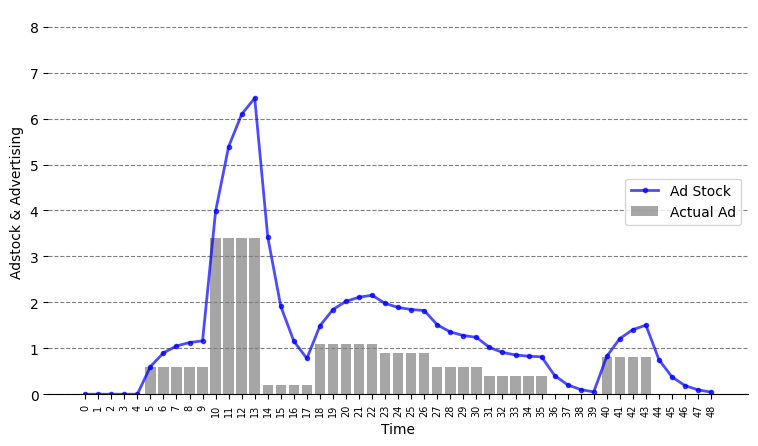

In [97]:
#Adstock rate =.5 
advertising=ConsumerElectronics_home_full['Content_marketing']
adstocked_Content_marketing=ConsumerElectronics_home_full['Adstock_Content_marketing']
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
plt.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')
ax.set_ylim([0, 1.3*max(adstocked_Content_marketing)])
bar = ax.bar(np.arange(len(advertising)), advertising, width=0.8, color='gray', alpha=0.7, label='Actual Ad')
line = ax.plot(np.arange(len(advertising)), adstocked_Content_marketing, 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='blue', alpha=0.7, label='Ad Stock')
ax.set_xlabel('Time')
ax.set_ylabel('Adstock & Advertising')
ax.annotate("Advertising Adstock Transformation", (np.mean(np.arange(len(advertising))), 100),
            verticalalignment='bottom', horizontalalignment='center',
            fontsize=15, color='#681963')
ax.set_xticks(np.arange(len(advertising)))
ax.set_xticklabels(labels=np.arange(len(advertising)), minor=False, fontsize=7, rotation=90)
ax.legend(loc='center right')  
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\1517277161.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\1517277161.py:10: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')


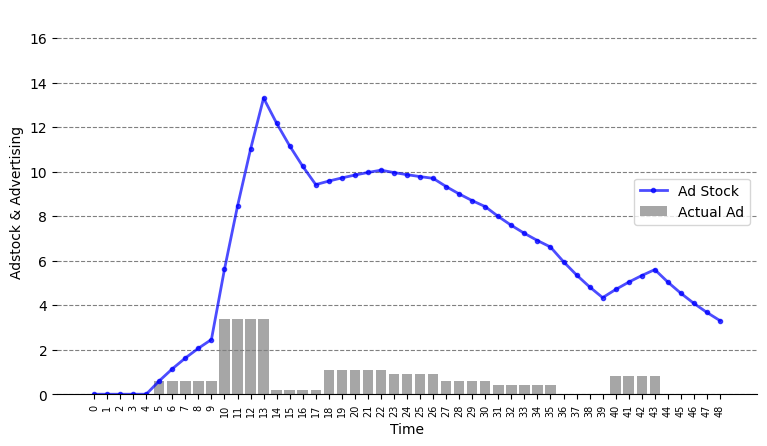

In [98]:
ConsumerElectronics_home_full['Adstock_Content_marketing'] = adstocked_advertising(adstock_rate=0.9, advertising=ConsumerElectronics_home_full['Content_marketing'])
#Adstock rate =.9
advertising=ConsumerElectronics_home_full['Content_marketing']
adstocked_Content_marketing=ConsumerElectronics_home_full['Adstock_Content_marketing']
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
plt.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')
ax.set_ylim([0, 1.3*max(adstocked_Content_marketing)])
bar = ax.bar(np.arange(len(advertising)), advertising, width=0.8, color='gray', alpha=0.7, label='Actual Ad')
line = ax.plot(np.arange(len(advertising)), adstocked_Content_marketing, 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='blue', alpha=0.7, label='Ad Stock')
ax.set_xlabel('Time')
ax.set_ylabel('Adstock & Advertising')
ax.annotate("Advertising Adstock Transformation", (np.mean(np.arange(len(advertising))), 100),
            verticalalignment='bottom', horizontalalignment='center',
            fontsize=15, color='#681963')
ax.set_xticks(np.arange(len(advertising)))
ax.set_xticklabels(labels=np.arange(len(advertising)), minor=False, fontsize=7, rotation=90)
ax.legend(loc='center right')  
plt.show()

In [99]:
#Computing Moving average to the sales data to evaluate any important features
ConsumerElectronics_home_full['ma2_Units']=ConsumerElectronics_home_full['units'].rolling(window=2).mean()
ConsumerElectronics_home_full['ma3_Units']=ConsumerElectronics_home_full['units'].rolling(window=3).mean()

ConsumerElectronics_home_full['ma2_discount_offered']=ConsumerElectronics_home_full['discount_offered'].rolling(window=2).mean()
ConsumerElectronics_home_full['ma3_discount_offered']=ConsumerElectronics_home_full['discount_offered'].rolling(window=3).mean()

In [100]:
#Taking a backup copy of the master dataset
ConsumerElectronics_home_full.shape
ConsumerElectronics_home_full_bckup=ConsumerElectronics_home_full

In [101]:
#Creating the lag variables for nps, holiday, discounts
dis_off=pd.concat([ConsumerElectronics_home_full['discount_offered'].shift(-1), ConsumerElectronics_home_full['discount_offered'].shift(-2)], axis=1)
dis_off.columns= ['lag1_discount_offered','lag2_discount_offered']

nps_dtl=pd.concat([ConsumerElectronics_home_full['nps'].shift(-1), ConsumerElectronics_home_full['nps'].shift(-2)], axis=1)
nps_dtl.columns= ['lag1_nps','lag2_nps']

holiday_dtl=pd.concat([ConsumerElectronics_home_full['holiday_flag'].shift(-1), ConsumerElectronics_home_full['holiday_flag'].shift(-2)], axis=1)
holiday_dtl.columns= ['lag1_holiday','lag2_holiday']

In [102]:
#Adding the lag variables to the dataset
ConsumerElectronics_home_full=pd.concat([ConsumerElectronics_home_full.reset_index(drop=True),dis_off],axis=1)
ConsumerElectronics_home_full=pd.concat([ConsumerElectronics_home_full.reset_index(drop=True),nps_dtl],axis=1)
ConsumerElectronics_home_full=pd.concat([ConsumerElectronics_home_full.reset_index(drop=True),holiday_dtl],axis=1)

In [103]:
ConsumerElectronics_home_full.head()

,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,prepaid_perc,pay_flag,holiday_flag,Adstock_Content_marketing,Adstock_Digital,Adstock_TV,ma2_Units,ma3_Units,ma2_discount_offered,ma3_discount_offered,lag1_discount_offered,lag2_discount_offered,lag1_nps,lag2_nps,lag1_holiday,lag2_holiday
0,2200.19,2212.83,1.01,7.51,0.33,2.73,2015.00,7.00,28,0.00,2.50,54.60,7.40,1177,17.10,0.20,2.38,0.28,24.83,0.00,4.42,0.00,0.25,0.00,0.00,0.00,2.50,0.20,NaN,NaN,NaN,NaN,0.35,0.34,54.60,54.60,1.00,0.00
1,2191.22,2204.34,1.01,7.11,0.35,2.65,2015.00,7.00,29,0.00,2.50,54.60,7.40,1177,17.10,0.20,5.18,0.00,28.75,0.00,1.40,0.00,0.24,1.00,1.00,0.00,3.75,0.30,1.01,NaN,0.34,NaN,0.34,0.34,54.60,54.60,0.00,0.00
2,2105.87,2118.36,1.01,7.15,0.34,2.70,2015.00,7.00,30,0.00,2.50,54.60,7.40,1177,17.10,0.20,5.06,0.00,29.75,0.00,0.90,0.00,0.22,0.00,0.00,0.00,4.38,0.35,1.01,1.01,0.34,0.34,0.34,0.16,54.60,60.00,0.00,0.00
3,2171.38,2181.93,1.01,7.30,0.34,2.66,2015.00,7.00,31,0.00,2.50,54.60,7.40,1177,17.10,0.20,6.57,0.00,31.58,0.00,4.63,0.00,0.23,1.00,0.00,0.00,4.69,0.38,1.01,1.01,0.34,0.34,0.16,0.38,60.00,46.90,0.00,0.00
4,2599.00,2599.00,1.00,9.00,0.16,2.00,2015.00,8.00,32,0.00,1.30,60.00,1.10,1206,5.10,0.00,3.65,0.00,27.20,0.00,0.28,0.00,1.00,0.00,0.00,0.00,3.64,0.19,1.00,1.01,0.25,0.28,0.38,0.38,46.90,46.90,0.00,0.00


In [104]:
#nan treatment in the dataset
ConsumerElectronics_home_full=ConsumerElectronics_home_full.replace(np.nan, 0)

In [105]:
#Dropping variables with high multi-collinearity
corr = ConsumerElectronics_home_full.corr()
corr.style.background_gradient(cmap='coolwarm')

,list_price,gmv,units,sla,discount_offered,product_procurement_sla,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,prepaid_perc,pay_flag,holiday_flag,Adstock_Content_marketing,Adstock_Digital,Adstock_TV,ma2_Units,ma3_Units,ma2_discount_offered,ma3_discount_offered,lag1_discount_offered,lag2_discount_offered,lag1_nps,lag2_nps,lag1_holiday,lag2_holiday
list_price,1.000000,0.997204,0.176774,-0.077613,-0.202268,-0.342164,0.100047,0.018865,0.191140,-0.032996,0.041222,0.318461,-0.228847,0.251015,-0.231440,-0.281167,0.196498,-0.155367,0.205161,0.000428,-0.208232,-0.112914,-0.059551,-0.114973,0.087382,0.034734,0.086727,-0.260413,-0.027421,-0.038263,-0.094292,-0.070223,-0.133389,-0.201831,-0.059306,-0.251334,-0.088228,-0.142235
gmv,0.997204,1.000000,0.234649,-0.090389,-0.183801,-0.365151,0.097970,0.021083,0.191193,-0.015154,0.058400,0.301481,-0.215245,0.248490,-0.212148,-0.263241,0.179735,-0.154582,0.200327,-0.005468,-0.218752,-0.129068,-0.074719,-0.124235,0.110822,0.044737,0.100183,-0.243119,-0.023308,-0.034549,-0.086723,-0.062313,-0.138021,-0.194710,-0.072745,-0.251949,-0.083255,-0.146322
units,0.176774,0.234649,1.000000,-0.233823,0.058913,-0.127620,0.117512,-0.039597,0.187682,0.031984,0.071151,-0.028387,0.072525,0.150018,0.082234,0.160392,-0.172971,-0.075723,0.042517,-0.118822,-0.152832,-0.189756,-0.152882,-0.081747,0.098314,0.026315,0.036323,0.198413,0.037767,0.063625,0.016812,0.061949,-0.004166,0.051036,-0.022001,0.015908,-0.077805,-0.134954
sla,-0.077613,-0.090389,-0.233823,1.000000,-0.601989,-0.067175,-0.586219,0.282868,-0.746701,0.053121,0.232664,0.407973,-0.036416,0.069533,-0.132701,-0.174544,0.176725,-0.201982,0.154998,-0.050396,-0.014112,-0.075217,0.312166,0.087158,-0.150381,-0.331402,0.220302,-0.237869,-0.299591,-0.377134,-0.471601,-0.474232,0.077084,0.217331,0.309571,0.376783,0.006221,-0.001449
discount_offered,-0.202268,-0.183801,0.058913,-0.601989,1.000000,0.099792,0.118488,-0.059337,0.142441,0.255846,0.039665,-0.614784,0.156362,-0.253136,0.355739,0.329899,-0.459897,0.441471,-0.465098,0.088339,0.151330,0.102698,-0.343568,0.066450,0.375864,0.576933,0.109583,0.388467,0.140263,0.171028,0.550266,0.434565,0.230972,0.277382,-0.011025,0.095629,0.175937,0.270522
product_procurement_sla,-0.342164,-0.365151,-0.127620,-0.067175,0.099792,1.000000,0.108064,-0.189706,-0.026238,-0.102702,-0.085137,0.012925,-0.039073,-0.056975,-0.054797,-0.010756,0.102506,0.043007,0.012043,0.142507,-0.033437,0.135980,-0.149569,0.107695,-0.371637,-0.152397,-0.118572,-0.037621,-0.124659,-0.137556,-0.085827,-0.175754,0.020170,-0.088130,0.116482,0.074017,-0.014556,0.148133
Year,0.100047,0.097970,0.117512,-0.586219,0.118488,0.108064,1.000000,-0.874725,0.857482,-0.317795,-0.416612,0.190755,-0.422693,0.045800,-0.237233,0.071458,-0.166131,0.328959,-0.224188,0.204599,0.089670,0.204177,0.112127,-0.055369,-0.083172,0.085966,-0.477788,0.161745,0.160223,0.224825,0.208078,0.277568,-0.082507,-0.167198,-0.018037,-0.087320,-0.083172,-0.034933
Month,0.018865,0.021083,-0.039597,0.282868,-0.059337,-0.189706,-0.874725,1.000000,-0.504264,0.304733,0.393997,-0.345407,0.542076,0.034870,0.310497,-0.023693,0.103770,-0.377506,0.262195,-0.310176,-0.156753,-0.277989,-0.219355,0.048956,0.047427,0.040686,0.472625,-0.078443,-0.023802,-0.032512,-0.071213,-0.094983,0.054782,0.060738,-0.147659,-0.104782,0.008260,-0.051975
week_year,0.191140,0.191193,0.187682,-0.746701,0.142441,-0.026238,0.857482,-0.504264,1.000000,-0.240075,-0.321710,-0.030728,-0.176988,0.114503,-0.089451,0.106935,-0.182416,0.187870,-0.123155,0.034653,-0.006415,0.065186,-0.034990,-0.048392,-0.104269,0.198622,-0.347855,0.213097,0.273413,0.376359,0.308232,0.406580,-0.113052,-0.245525,-0.201659,-0.285127,-0.145319,-0.101558
Content_marketing,-0.032996,-0.015154,0.031984,0.053121,0.255846,-0.102702,-0.317795,0.304733,-0.240075,1.000000,0.899344,-0.654217,0.705083,-0.032326,0.859334,0.321822,-0.334688,0.057055,-0.

In [106]:
#Removing rejected variables based on the profiling/correlation plot
ConsumerElectronics_home_full = ConsumerElectronics_home_full.drop(columns=['Digital','TV', 'list_price', 'ma2_discount_offered','ma3_discount_offered','ma3_Units','Month','Year'])

In [107]:
### Creating a backup data
ConsumerElectronics_home_full_bkp = ConsumerElectronics_home_full.copy(deep=True)

In [108]:
ConsumerElectronics_home_full = ConsumerElectronics_home_full.drop(columns=['week_year', 'units'])

In [109]:
# Get column names first
names = ConsumerElectronics_home_full.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(ConsumerElectronics_home_full)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [110]:
#Building a basic linear reg model on the analytical dataset
lreg = LinearRegression()
X=scaled_df.drop(columns=['gmv'])
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.gmv)
lreg.fit(x_train,y_train)
pred = lreg.predict(x_cv)

In [111]:
mse = np.mean((pred - y_cv)**2)
# calculating coefficients
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,sla,-1.08
1,discount_offered,0.06
2,product_procurement_sla,-0.32
3,Content_marketing,-1.26
4,nps,1.15
5,Sponsorship,-0.79
6,Stock_Index,-0.30
7,Total_investment,1.12
8,Cool_DegDays,-0.48
9,Heat_DegDays,1.38


In [112]:
lreg.score(x_cv,y_cv)

-4.7134839122223

In [113]:
#Alternate way of computing all the model statistics easily using sm.OLS
model = sm.OLS(y_train,x_train)
results = model.fit()
results.params
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.398
Method:                 Least Squares   F-statistic:                              1.883
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                       0.161
Time:                        14:25:28   Log-Likelihood:                         -17.471
No. Observations:                  36   AIC:                                      88.94
Df Residuals:                       9   BIC:                                      131.7
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [114]:
predictions = results.predict(x_cv)
predictions

14    2.82
28    0.79
11   -0.52
35   -1.53
7    -2.42
23    0.87
0    -5.32
29    2.32
25    0.36
9    -2.77
44    0.61
45    1.04
47    4.32
dtype: float64

In [115]:
#Initial RMSE
math.sqrt(np.mean(np.square((predictions-y_cv))))

2.1648046427638716

In [116]:
#handling multicollinearity
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
rfe = RFE(lm, step = 10)             # running RFE
rfe = rfe.fit(x_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[ True False False  True  True  True False  True False  True  True False
 False False False False False False  True  True  True  True  True False
  True False False]
[1 3 2 1 1 1 2 1 2 1 1 3 3 3 3 2 3 3 1 1 1 1 1 3 1 3 3]


In [117]:
x_rfe = x_train[x_train.columns[rfe.support_]]
model_rfe = sm.OLS(y_train,x_rfe)
results_rfe = model_rfe.fit()
results_rfe.params
print(results_rfe.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.613
Model:                            OLS   Adj. R-squared (uncentered):              0.394
Method:                 Least Squares   F-statistic:                              2.802
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                      0.0150
Time:                        14:25:28   Log-Likelihood:                         -34.485
No. Observations:                  36   AIC:                                      94.97
Df Residuals:                      23   BIC:                                      115.6
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [118]:
#Stepwise variable elimination method for linear regression with in and out p-value thresholds implementation
def stepwise_selection(X, y, 
                       #initial_list=['SLA','Adstock_Content_marketing','Adstock_Digital','Adstock_TV'], 
                       initial_list = ['sla', 'discount_offered', 'product_procurement_sla', 'Content_marketing', 'nps', 
                                       'Sponsorship', 'Stock_Index', 'Total_investment', 'Cool_DegDays', 'Heat_DegDays', 
                                       'Max_Temp', 'SnowonGrnd', 'TotalPrecip', 'TotalSnow', 'prepaid_perc', 'pay_flag',
                                       'holiday_flag', 'Adstock_Content_marketing', 'Adstock_Digital', 'Adstock_TV',
                                       'ma2_Units', 'lag1_discount_offered', 'lag2_discount_offered', 'lag1_nps',
                                       'lag2_nps', 'lag1_holiday', 'lag2_holiday'],
                       threshold_in=0.001, 
                       threshold_out = 0.1, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            del included[worst_feature]
            #included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [119]:
#Computing the best model automatically
result = stepwise_selection(x_train, y_train)
print('resulting features:')
print(result)

Drop                             17 with p-value 0.954197
Drop                             14 with p-value 0.898626
Drop                              1 with p-value 0.909286
Drop                             23 with p-value 0.895787
Drop                             20 with p-value 0.755976

C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explici


Drop                             17 with p-value 0.795235
Drop                             12 with p-value 0.654387


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                             13 with p-value 0.581638
Drop                              6 with p-value 0.351057
Drop                              9 with p-value 0.225265
Drop                              6 with p-value 0.242421


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explici

Drop                             15 with p-value 0.324969
Drop                              6 with p-value 0.277619
Drop                              6 with p-value 0.27702

C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)



Drop                              7 with p-value 0.101106
Drop                              2 with p-value 0.207418
resulting features:
['sla', 'product_procurement_sla', 'nps', 'Sponsorship', 'Stock_Index', 'TotalPrecip', 'Adstock_Digital', 'Adstock_TV', 'lag1_discount_offered', 'lag2_discount_offered', 'lag2_nps']


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


In [120]:
#Subsetting the data based on the above automatic determination of final variables for the model
x_train1=x_train.loc[:,[ 'discount_offered', 'Content_marketing', 'Sponsorship', 'Total_investment', 'Cool_DegDays', 'Heat_DegDays', 'prepaid_perc', 'lag1_discount_offered']]

In [121]:
#On the shortlisted data obtaining the final model statistics
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.161
Model:                            OLS   Adj. R-squared (uncentered):             -0.079
Method:                 Least Squares   F-statistic:                             0.6724
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                       0.711
Time:                        14:25:29   Log-Likelihood:                         -48.408
No. Observations:                  36   AIC:                                      112.8
Df Residuals:                      28   BIC:                                      125.5
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [122]:
#Predicting on the test data
x_cv2=x_cv.loc[:,['discount_offered', 'Content_marketing', 'Sponsorship', 'Total_investment', 'Cool_DegDays', 'Heat_DegDays', 'prepaid_perc', 'lag1_discount_offered']]
#results.predict(x_cv2)

In [123]:
#RMSE
math.sqrt(np.mean(np.square((results.predict(x_cv2)-y_cv))))

0.9093087579743605

In [124]:
#MSE
mse = np.mean((results.predict(x_cv2) - y_cv)**2)
mse

0.8268424173288742

In [125]:
#Koyck Model (Lag 1 of GMV)
ConsumerElectronics_home_full['GMV_1']=ConsumerElectronics_home_full['gmv'].shift(-1)
ConsumerElectronics_home_full=ConsumerElectronics_home_full.fillna(0)

# Get column names first
names = ConsumerElectronics_home_full.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(ConsumerElectronics_home_full)
scaled_df = pd.DataFrame(scaled_df, columns=names)

X=scaled_df.drop(columns=['gmv'])
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.gmv)

#Computing the best model automatically
result = stepwise_selection(x_train, y_train)
print('resulting features:')
print(result)

Drop                             21 with p-value 0.901865
Drop                              6 with p-value 0.945579
Drop                             18 with p-value 0.879197
Drop                             16 with p-value 0.669622


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explici

Drop                             22 with p-value 0.546178
Drop                             14 with p-value 0.535247
Drop                             17 with p-value 0.507106
Drop                              9 with p-value 0.711004


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                             18 with p-value 0.535867
resulting features:
['sla', 'discount_offered', 'product_procurement_sla', 'Content_marketing', 'nps', 'Sponsorship', 'Total_investment', 'Cool_DegDays', 'Heat_DegDays', 'SnowonGrnd', 'TotalPrecip', 'TotalSnow', 'prepaid_perc', 'holiday_flag', 'Adstock_Digital', 'ma2_Units', 'lag1_nps', 'lag2_nps']


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


In [126]:
#Subsetting the data based on the above automatic determination of final variables for the model
x_train1=x_train.loc[:,['sla', 'discount_offered', 'Content_marketing', 'nps', 'Sponsorship', 'Total_investment', 'Max_Temp', 'prepaid_perc', 'Adstock_Digital', 'Adstock_TV', 'lag2_discount_offered', 'lag1_nps', 'lag2_holiday']]
#On the shortlisted data obtaining the final model statistics
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())
#Predicting on the test data
x_cv2=x_cv.loc[:,['sla', 'discount_offered', 'Content_marketing', 'nps', 'Sponsorship', 'Total_investment', 'Max_Temp', 'prepaid_perc', 'Adstock_Digital', 'Adstock_TV', 'lag2_discount_offered', 'lag1_nps', 'lag2_holiday']]
#results.predict(x_cv2)

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.586
Model:                            OLS   Adj. R-squared (uncentered):              0.353
Method:                 Least Squares   F-statistic:                              2.508
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                      0.0261
Time:                        14:25:30   Log-Likelihood:                         -36.001
No. Observations:                  36   AIC:                                      98.00
Df Residuals:                      23   BIC:                                      118.6
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [127]:
#Distributed Lag Models
ConsumerElectronics_home_full['GMV_1']=ConsumerElectronics_home_full['gmv'].shift(-1)
ConsumerElectronics_home_full['GMV_2']=ConsumerElectronics_home_full['gmv'].shift(-2)
ConsumerElectronics_home_full['GMV_3']=ConsumerElectronics_home_full['gmv'].shift(-3)
ConsumerElectronics_home_full=ConsumerElectronics_home_full.fillna(0)

# Get column names first
names = ConsumerElectronics_home_full.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(ConsumerElectronics_home_full)
scaled_df = pd.DataFrame(scaled_df, columns=names)

X=scaled_df.drop(columns=['gmv'])
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.gmv)

#Computing the best model automatically
result = stepwise_selection(x_train, y_train)
print('resulting features:')
print(result)

Drop                             12 with p-value 0.898369


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                              4 with p-value 0.827299
Drop                             15 with p-value 0.909743
Drop                              6 with p-value 0.817751


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                              4 with p-value 0.757137


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                             21 with p-value 0.799016
Drop                              1 with p-value 0.768365
Drop                              3 with p-value 0.589307


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                              2 with p-value 0.538997


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                              8 with p-value 0.528155
Drop                              5 with p-value 0.421106


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                             11 with p-value 0.292601


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                             11 with p-value 0.431082
Drop                             12 with p-value 0.444161


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                              7 with p-value 0.258373
Drop                              5 with p-value 0.395933
Drop                              3 with p-value 0.205915


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                              3 with p-value 0.84137
Drop                              2 with p-value 0.404152
resulting features:
['sla', 'product_procurement_sla', 'prepaid_perc', 'Adstock_Digital', 'Adstock_TV', 'ma2_Units', 'lag1_nps', 'lag1_holiday']


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


In [128]:
#Subsetting the data based on the above automatic determination of final variables for the model
x_train1=x_train.loc[:,['sla', 'discount_offered', 'product_procurement_sla', 'Content_marketing', 'nps', 'Sponsorship', 'Total_investment', 'Heat_DegDays', 'prepaid_perc', 'Adstock_Content_marketing', 'Adstock_TV', 'lag1_discount_offered', 'lag1_nps','GMV_1']]
#On the shortlisted data obtaining the final model statistics
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())
#Predicting on the test data
x_cv2=x_cv.loc[:,['sla', 'discount_offered', 'product_procurement_sla', 'Content_marketing', 'nps', 'Sponsorship', 'Total_investment', 'Heat_DegDays', 'prepaid_perc', 'Adstock_Content_marketing', 'Adstock_TV', 'lag1_discount_offered', 'lag1_nps','GMV_1']]
results.predict(x_cv2)


                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.631
Model:                            OLS   Adj. R-squared (uncentered):              0.397
Method:                 Least Squares   F-statistic:                              2.691
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                      0.0183
Time:                        14:25:31   Log-Likelihood:                         -29.973
No. Observations:                  36   AIC:                                      87.95
Df Residuals:                      22   BIC:                                      110.1
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

48    2.24
42    0.01
19   -0.02
45    0.54
24   -0.59
32    0.52
20   -1.28
34   -0.98
36   -0.75
14    0.86
8    -0.92
1    -0.20
4    -1.30
dtype: float64

In [129]:
#RMSE
rmse=math.sqrt(np.mean(np.square((results.predict(x_cv2)-y_cv))))
rmse

1.4337256620442704

In [130]:
#MSE
mse = np.mean((results.predict(x_cv2) - y_cv)**2)
mse

2.0555692740042812

In [131]:
#Exponential/Multiplicative Models
ConsumerElectronics_home_full=np.log(ConsumerElectronics_home_full)
ConsumerElectronics_home_full=ConsumerElectronics_home_full.fillna(0)
ConsumerElectronics_home_full=ConsumerElectronics_home_full.replace([np.inf, -np.inf], 0)

# Get column names first
names = ConsumerElectronics_home_full.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(ConsumerElectronics_home_full)
scaled_df = pd.DataFrame(scaled_df, columns=names)

X=scaled_df.drop(columns=['gmv'])
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.gmv)

x_train, x_cv, y_train, y_cv = train_test_split(X,ConsumerElectronics_home_full.gmv)

C:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [132]:
#Computing the best model automatically
result = stepwise_selection(x_train, y_train)
print('resulting features:')
print(result)

C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                             17 with p-value 0.972875
Drop                              2 with p-value 0.975626
Drop                             10 with p-value 0.942584


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explici

Drop                              4 with p-value 0.919479
Drop                              2 with p-value 0.770058


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                             16 with p-value 0.713101
Drop                             15 with p-value 0.607079


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                             14 with p-value 0.483546


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                             12 with p-value 0.433739
Drop                              3 with p-value 0.339365


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                             10 with p-value 0.903759


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                              1 with p-value 0.233272
Drop                             12 with p-value 0.177654


C:\Users\gaura\AppData\Local\Temp\ipykernel_8048\2061463695.py:31: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Drop                             10 with p-value 0.447916
resulting features:
['sla', 'nps', 'Total_investment', 'Cool_DegDays', 'Heat_DegDays', 'Max_Temp', 'TotalPrecip', 'TotalSnow', 'prepaid_perc', 'Adstock_Digital', 'lag1_nps', 'lag1_holiday', 'lag2_holiday']


In [133]:
#Subsetting the data based on the above automatic determination of final variables for the model
x_train1=x_train.loc[:,['discount_offered', 'Content_marketing', 'Sponsorship', 'Stock_Index', 'Total_investment', 'Cool_DegDays', 'Max_Temp', 'Adstock_Digital', 'Adstock_TV', 'lag1_holiday']]
#On the shortlisted data obtaining the final model statistics
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())
#Predicting on the test data
x_cv2=x_cv.loc[:,['discount_offered', 'Content_marketing', 'Sponsorship', 'Stock_Index', 'Total_investment', 'Cool_DegDays', 'Max_Temp', 'Adstock_Digital', 'Adstock_TV', 'lag1_holiday']]
results.predict(x_cv2)


                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.103
Model:                            OLS   Adj. R-squared (uncentered):             -0.195
Method:                 Least Squares   F-statistic:                             0.3462
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                       0.950
Time:                        14:25:33   Log-Likelihood:                         -122.54
No. Observations:                  36   AIC:                                      263.1
Df Residuals:                      27   BIC:                                      277.3
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

C:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


2     -5.88
32     1.04
19     4.32
4    -28.48
39     1.95
35    -0.42
14     2.21
0     -6.93
28     4.23
27     2.86
45    -0.95
26    -3.55
10     0.92
dtype: float64

In [134]:
#RMSE
rmse=math.sqrt(np.mean(np.square((results.predict(x_cv2)-y_cv))))
rmse

12.955295813470235

In [135]:
#MSE
mse = np.mean((results.predict(x_cv2) - y_cv)**2)
mse

167.8396896145194

<AxesSubplot: xlabel='gmv', ylabel='discount_offered'>

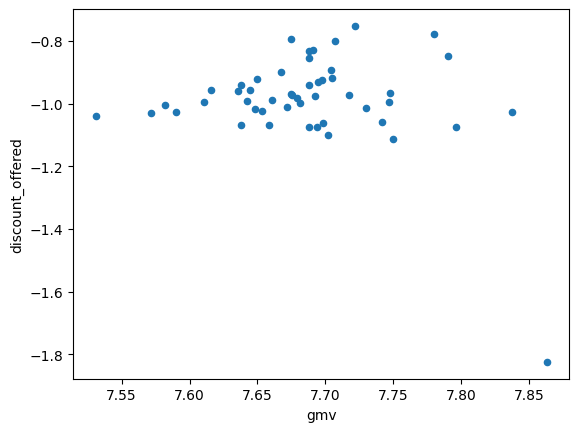

In [136]:
ConsumerElectronics_home_full.plot.scatter('gmv','discount_offered')

<AxesSubplot: xlabel='gmv', ylabel='prepaid_perc'>

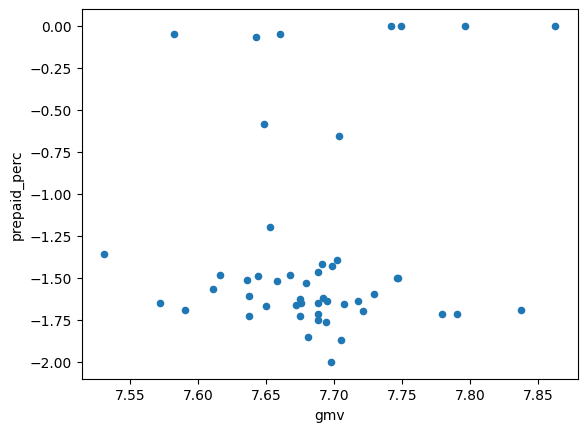

In [137]:
ConsumerElectronics_home_full.plot.scatter('gmv','prepaid_perc')

<AxesSubplot: xlabel='gmv', ylabel='sla'>

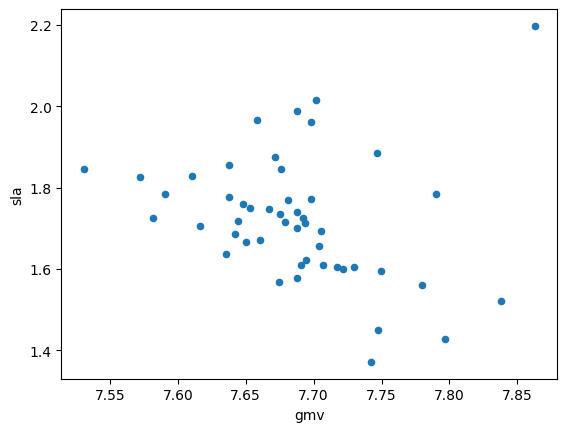

In [138]:
ConsumerElectronics_home_full.plot.scatter('gmv','sla')

<AxesSubplot: xlabel='gmv', ylabel='Adstock_Content_marketing'>

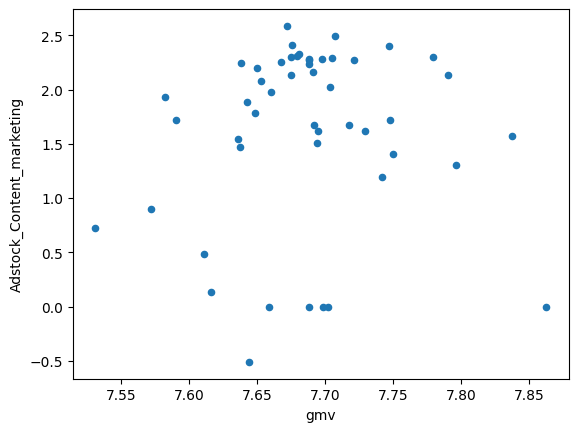

In [139]:
ConsumerElectronics_home_full.plot.scatter('gmv','Adstock_Content_marketing')

In [140]:
#Outlier Treatments creating function for identifing lower and upper range
%matplotlib inline
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3-Q1
 lower_range = Q1-(1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [141]:
lowerbound,upperbound = outlier_treatment(ConsumerElectronics_home_full.Adstock_Content_marketing)
lowerbound,upperbound

(0.10794021539638465, 3.570457950918477)

In [142]:
lowerbound,upperbound = outlier_treatment(ConsumerElectronics_home_full.discount_offered)
lowerbound,upperbound

(-1.179355376599644, -0.770683189918441)

In [143]:
lowerbound,upperbound = outlier_treatment(ConsumerElectronics_home_full.sla)
lowerbound,upperbound

(1.348725104703958, 2.0447243330119167)

In [144]:
lowerbound,upperbound = outlier_treatment(ConsumerElectronics_home_full.prepaid_perc)
lowerbound,upperbound

(-2.1035737787766333, -1.003584357030463)

In [145]:
#Range identification and manually deciding the cut off
lower_range=0.09
upper_range=0.6
ConsumerElectronics_home_full.prepaid_perc[(ConsumerElectronics_home_full.prepaid_perc < lower_range)|(ConsumerElectronics_home_full.prepaid_perc > upper_range)]

0    -1.39
1    -1.43
2    -1.52
3    -1.46
4     0.00
5    -1.49
6    -1.48
7    -1.57
8    -1.36
9    -1.65
10   -1.69
11   -1.71
12   -1.50
13   -1.66
14   -1.65
15   -1.65
16   -1.85
17   -1.72
18   -1.48
19   -1.70
20   -2.00
21   -1.71
22   -1.53
23   -1.73
24   -1.87
25   -1.75
26   -1.65
27   -1.72
28   -1.66
29   -1.42
30   -1.62
31   -1.20
32   -0.65
33   -0.05
34   -0.05
35   -0.06
36   -0.58
37   -1.62
38   -1.69
39   -1.61
40   -1.51
41   -1.64
42   -1.64
43   -1.50
44   -1.60
45   -1.76
46    0.00
47    0.00
48    0.00
Name: prepaid_perc, dtype: float64

In [146]:
#outlier Treatment
ConsumerElectronics_home_full.prepaid_perc[(ConsumerElectronics_home_full.prepaid_perc < lower_range) ]=lower_range
ConsumerElectronics_home_full.prepaid_perc[(ConsumerElectronics_home_full.prepaid_perc > upper_range)]=upper_range

In [147]:
#post Treatment
ConsumerElectronics_home_full.prepaid_perc[(ConsumerElectronics_home_full.prepaid_perc < lower_range)|(ConsumerElectronics_home_full.prepaid_perc > upper_range)]

Series([], Name: prepaid_perc, dtype: float64)

In [148]:
#Regularization implementation - advanced modeling
## training the model on ridge reg
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_cv)
mse = np.mean((pred - y_cv)**2)
mse

C:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


0.007752903486854104

In [149]:
ridgeReg.coef_

array([-0.04531266,  0.00296436, -0.00460242,  0.00980566,  0.01520649,
        0.00087831,  0.00153898, -0.01311312, -0.00322922, -0.0042765 ,
       -0.00111923,  0.00683241, -0.00748851, -0.00640872, -0.01834377,
        0.        ,  0.        ,  0.01212135,  0.0280651 , -0.01723501,
        0.01512951, -0.0037804 ,  0.00597508,  0.00096249,  0.00308747,
        0.        ,  0.        ,  0.0051979 ,  0.00075356, -0.00909915])

In [150]:
#training model using lasso reg
lassoReg = Lasso(alpha=.05, normalize=True)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_cv)

# calculating mse
mse = np.mean((pred - y_cv)**2)
mse
lassoReg.score(x_cv,y_cv)

C:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


-0.0008561251422349869

In [151]:
lassoReg.coef_

array([-0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0., -0.,
       -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,
        0., -0., -0., -0.])

In [152]:
#traning the model on elastic net reg
ENreg = ElasticNet(alpha=.1, l1_ratio=0.5, normalize=False)
ENreg.fit(x_train,y_train)
pred_cv = ENreg.predict(x_cv)

#calculating mse
mse = np.mean((pred - y_cv)**2)
mse

C:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


0.003777804299066607

In [153]:
ENreg.coef_

array([-0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0., -0.,
       -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,
        0., -0., -0., -0.])